We start with a csv (comma-separated-value) file that is output from the DoubleMu dataset from the CMS experiment. The data was collected in 2011.

The selections used on the two muons:
* |$\eta$| < 2.4
* 2 < $M_{\mu\mu}$ < 5 GeV 
* at least one of the muons is a global muon

Let's calculate the invariant mass $M$ of the two muons where:

$M = \sqrt{2p_{t}^{1}p_{t}^{2}(\cosh(\eta_{1}-\eta_{2}) - \cos(\phi_{1}-\phi_{2}))}$

First let's get the data from the csv file into a data frame:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/Jpsimumu_Run2011A.csv')

What's in the file and how many events do we have?

In [2]:
df.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75206813,G,10.16230,0.476262,-8.51642,5.52306,8.52973,0.609133,-1.514930,...,G,19.77540,2.750800,-13.987100,13.705900,14.255000,0.853872,-1.376610,1,3.11319
1,165617,75678475,G,15.87990,15.061800,-1.66581,-4.74643,15.15360,-0.308313,-0.110151,...,G,11.93380,11.908400,-0.767017,-0.085117,11.933000,-0.007133,-0.064321,-1,4.11735
2,165617,74428554,G,21.82790,-6.221380,11.08450,17.74470,12.71110,1.135660,2.082250,...,G,36.65130,-10.687400,15.069200,31.654400,18.474300,1.307610,2.187680,1,3.10098
3,165617,75193169,G,19.49230,2.761250,-5.57686,-18.47190,6.22301,-1.808380,-1.111050,...,G,14.93340,1.552490,-6.125350,-13.530200,6.319020,-1.505050,-1.322570,-1,2.33329
4,165617,74832715,G,8.09718,4.612670,-1.83886,6.39492,4.96570,1.071000,-0.379345,...,T,3.51313,-0.530458,0.688020,3.402380,0.868767,2.074220,2.227600,1,4.56326


In [3]:
len(df)

31892

In [4]:
# Calculate the invariant mass and add it as a column (there is actually one there already but
# let's pretend there isn't for now)
df['m'] = np.sqrt(2*df['pt1']*df['pt2']*(np.cosh(df['eta1']-df['eta2']) - np.cos(df['phi1']-df['phi2'])))

nbins = 100

M_hist = np.histogram(df['m'], bins=nbins, range=(2,5))

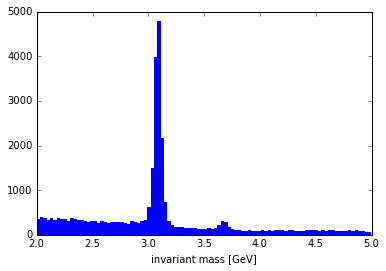

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='b', linewidth=0, edgecolor='b')
plt.xlabel('invariant mass [GeV]')
plt.xlim(2,5)
plt.show()

In [6]:
# Select for muons of opposite-sign and where both are global muons
ms = df[(df.Q1 != df.Q2) & ((df.Type1 == 'G') & (df.Type2 == 'G'))]
len(ms)

23845

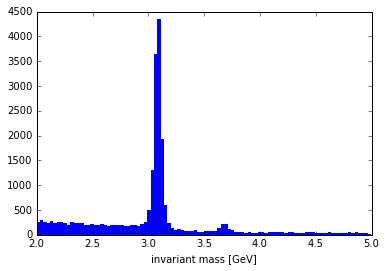

In [7]:
M_hist = np.histogram(ms['m'], bins=nbins, range=(2,5))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='b', linewidth=0)
plt.xlabel('invariant mass [GeV]')
plt.xlim(2,5)
plt.show()

Finally, let's plot the log10 of the invariant mass:

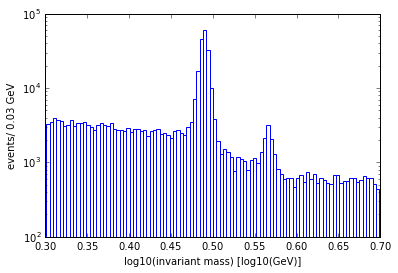

In [8]:
weights = [nbins/np.log(10)/m for m in ms['m']]
M_hist = np.histogram(np.log10(ms['m']), bins=nbins, weights=weights, range=(np.log10(2),np.log10(5)))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.yscale('log')
plt.xlabel('log10(invariant mass) [log10(GeV)]')
plt.ylabel('events/ 0.03 GeV')
plt.show()